# Install libraries

In [1]:
!conda install -y gdown
!pip install google-play-scraper

/bin/bash: line 1: conda: command not found


In [2]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 1.9 MB/s eta 0:00:00


# Import Library

In [3]:
from google_play_scraper import Sort, reviews_all, reviews
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  # Import MultinomialNB for text data
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Retrieve a user review of the PT KAI application from the Google Play web site.

In [4]:
!gdown --id 1DNk2OaNf9FY7yBYeFmT14oyz0SEYXthX

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DNk2OaNf9FY7yBYeFmT14oyz0SEYXthX
To: /content/hasilptkai.xlsx
100% 325k/325k [00:00<00:00, 75.7MB/s]


# Read the dataset

In [5]:
ptkai = pd.read_excel('hasilptkai.xlsx')
ptkai.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,3fa64c6f-dfa7-4411-b80e-d0cffeef507f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"PT. KAI yg terhormat, tolong aplikasi ini diti...",3,0,1.1.1.3,2018-09-16 05:45:00,NaN,NaN,1.1.1.3,most_relevant,<function app at 0x795921c60820>
1,5a3c2712-1595-46a9-a540-0d49ef6c3c69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Loading nya lelet... Padahal jaringannya 4G..s...,3,0,NaN,2018-10-13 02:09:02,NaN,NaN,NaN,most_relevant,<function app at 0x795921c60820>
2,0c757a43-2671-41a1-bfe6-0298290b4239,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"""mohon cek koneksi anda"" harusnya diubah menja...",3,0,1.3.0.1,2018-10-14 14:59:33,NaN,NaN,1.3.0.1,most_relevant,<function app at 0x795921c60820>
3,6d4c7305-a9df-4634-ab9d-8bd4c635d15d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,3,0,NaN,2018-10-16 14:13:14,NaN,NaN,NaN,most_relevant,<function app at 0x795921c60820>
4,2f5c5248-b44c-48d6-8e43-ad8ba32bf1af,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",3,0,NaN,2018-12-13 02:55:49,"Terima kasih telah menggunakan KAI Access, moh...",2018-12-13 04:47:28,NaN,most_relevant,<function app at 0x795921c60820>


# Data Exploration

## Displays the entire dataset column

In [6]:
ptkai.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'sortOrder', 'appId'],
      dtype='object')

## Summary

In [7]:
# menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = ptkai.info()
print('Ringkasan informasi:', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1795 non-null   object
 1   userName              1795 non-null   object
 2   userImage             1795 non-null   object
 3   content               1795 non-null   object
 4   score                 1795 non-null   int64 
 5   thumbsUpCount         1795 non-null   int64 
 6   reviewCreatedVersion  1570 non-null   object
 7   at                    1795 non-null   object
 8   replyContent          280 non-null    object
 9   repliedAt             280 non-null    object
 10  appVersion            1570 non-null   object
 11  sortOrder             1795 non-null   object
 12  appId                 1795 non-null   object
dtypes: int64(2), object(11)
memory usage: 182.4+ KB
Ringkasan informasi: None


## Find Missing Values

In [8]:
# menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', ptkai.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion     225
at                         0
replyContent            1515
repliedAt               1515
appVersion               225
sortOrder                  0
appId                      0
dtype: int64


Ada 2 kolom yang mempunyai banyak missing values berjumlah 1515, yaitu replyContent dan repliedAt. Selain itu, terdapat kolom yang berisi missing values yang berjumlah 225 NaN, yaitu reviewCreatedVersion dan appVersion. Kolom replyContent dan repliedAt tidak dilakukan pengisian nilai karena berisi balasan ulasan yang diberikan oleh pihak PT KAI terhadap ulasan pengguna dan tanggal balasannya. Sedangkan missing values yang terdapat di kolom reviewCreatedVersion dan appVersion tidak diisi karena berisi versi dari aplikasi PT KAI.

## Remove Missing Values

In [11]:
# menghapus kolom replyContent, repliedAt, reviewCreatedVersion, dan appVersion yang berisi missing values
ptkai = ptkai.drop(['replyContent','repliedAt','reviewCreatedVersion','appVersion'], axis=1)
ptkai.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,sortOrder,appId
0,3fa64c6f-dfa7-4411-b80e-d0cffeef507f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"PT. KAI yg terhormat, tolong aplikasi ini diti...",3,0,2018-09-16 05:45:00,most_relevant,<function app at 0x795921c60820>
1,5a3c2712-1595-46a9-a540-0d49ef6c3c69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Loading nya lelet... Padahal jaringannya 4G..s...,3,0,2018-10-13 02:09:02,most_relevant,<function app at 0x795921c60820>
2,0c757a43-2671-41a1-bfe6-0298290b4239,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"""mohon cek koneksi anda"" harusnya diubah menja...",3,0,2018-10-14 14:59:33,most_relevant,<function app at 0x795921c60820>
3,6d4c7305-a9df-4634-ab9d-8bd4c635d15d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,3,0,2018-10-16 14:13:14,most_relevant,<function app at 0x795921c60820>
4,2f5c5248-b44c-48d6-8e43-ad8ba32bf1af,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",3,0,2018-12-13 02:55:49,most_relevant,<function app at 0x795921c60820>


## Rename the columns

In [12]:
# mengganti nama kolom tanggal
ptkai.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah diganti:', ptkai.columns)

mengecek nama kolom yang sudah diganti: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'date', 'sortOrder', 'appId'],
      dtype='object')


## Separate the date in the timestamp of the At column

In [13]:
# memisahkan tanggal yang terletak di timestamps
ptkai['date'] = pd.to_datetime(ptkai['date']).dt.date
ptkai.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,date,sortOrder,appId
0,3fa64c6f-dfa7-4411-b80e-d0cffeef507f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"PT. KAI yg terhormat, tolong aplikasi ini diti...",3,0,2018-09-16,most_relevant,<function app at 0x795921c60820>
1,5a3c2712-1595-46a9-a540-0d49ef6c3c69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Loading nya lelet... Padahal jaringannya 4G..s...,3,0,2018-10-13,most_relevant,<function app at 0x795921c60820>
2,0c757a43-2671-41a1-bfe6-0298290b4239,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"""mohon cek koneksi anda"" harusnya diubah menja...",3,0,2018-10-14,most_relevant,<function app at 0x795921c60820>
3,6d4c7305-a9df-4634-ab9d-8bd4c635d15d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,3,0,2018-10-16,most_relevant,<function app at 0x795921c60820>
4,2f5c5248-b44c-48d6-8e43-ad8ba32bf1af,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",3,0,2018-12-13,most_relevant,<function app at 0x795921c60820>


In [14]:
# memisahkan tahun dan bulan
ptkai['year'] = pd.to_datetime(ptkai['date']).dt.year
ptkai['month'] = pd.to_datetime(ptkai['date']).dt.month
# ptkai['month'] = ptkai['month'].apply(lambda x: calendar.month_abbr[x])

# **Change Score Value to 1 adn 2 ( Negative and Postive )**

In [16]:
ptkai['score'] = ptkai['score'].apply(lambda x: 2 if x >= 4 else 1)

# Data Visualization

<ipython-input-18-083a3598da72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="score", data=ptkai, palette="pastel")


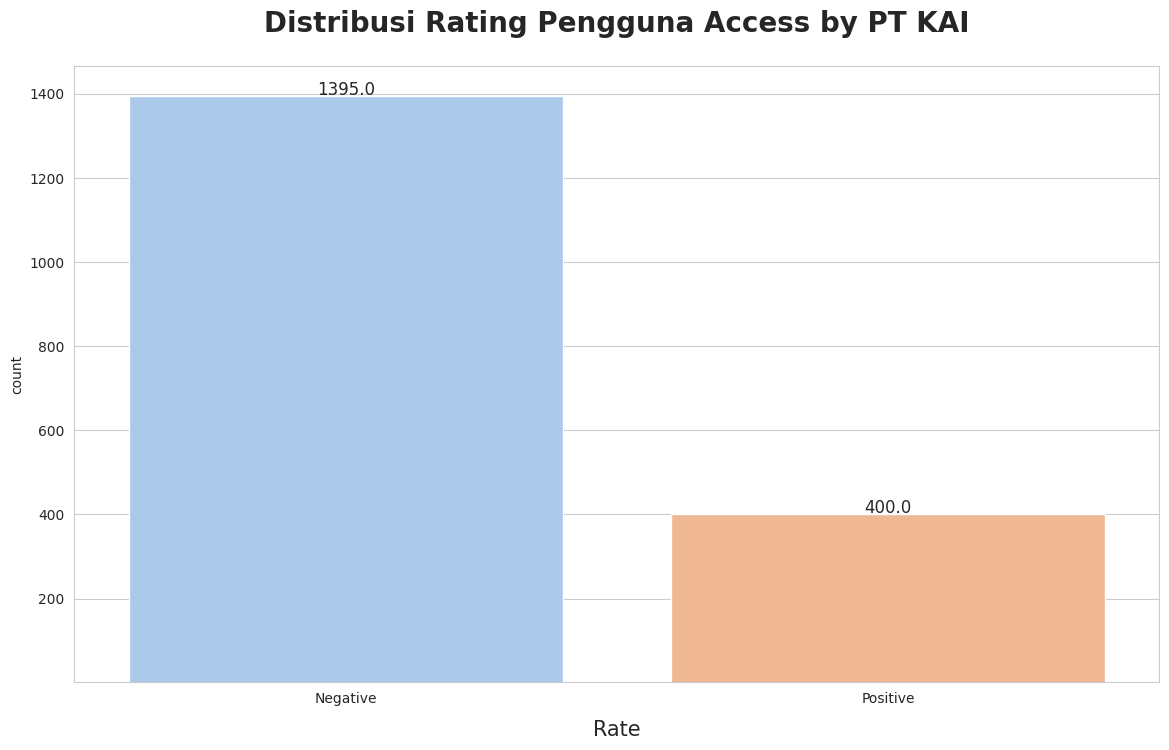

In [18]:
# visualisasi bar chart untuk melihat jumlah rating pengguna PT KAI
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1)
labels = ("Negative","Positive")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=ptkai, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna Access by PT KAI', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

In [19]:
grouped_data = ptkai.groupby(['score', 'year']).size().reset_index(name='count')

In [20]:
label_mapping = {
    "Dissatisfied": 0,
    "Satisfied": 1,
}

grouped_data['score'] = grouped_data['score'].map(label_mapping)

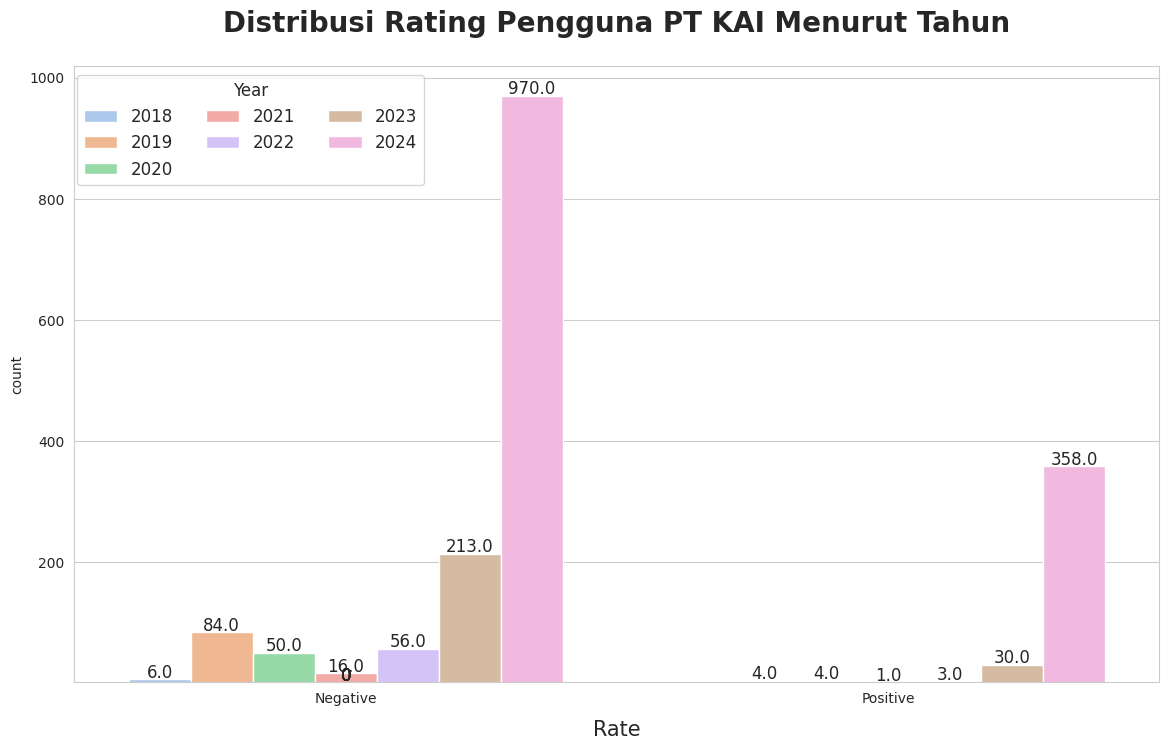

In [21]:
# mem-breakdown bar chart pada sel sebelumnya berdasarkan tahun
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1)
labels = ("Negative","Positive")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", hue="year", data=ptkai, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna PT KAI Menurut Tahun', fontsize=20,
          fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## Delete unnecessary columns and does not provide any information.

In [23]:
ptkai.drop(['reviewId','userName','userImage','thumbsUpCount','appId','year','month','sortOrder'], axis=1, inplace=True)

In [24]:
print('Ringkasan dataset setelah dilakukan manipulasi data', ptkai.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1795 non-null   object
 1   score    1795 non-null   int64 
 2   date     1795 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.2+ KB
Ringkasan dataset setelah dilakukan manipulasi data None


In [25]:
ptkai

,content,score,date
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13
...,...,...,...
1790,Apa apa susah isi KAI pay ..uang udah ditelan ...,1,2024-04-30
1791,Jelek aplkasi nya mending yg lama dah,1,2024-04-30
1792,Saran aja buat yg baru pake kai access buat me...,1,2024-04-30
1793,Saran aja buat yg baru pake kai access buat me...,1,2024-04-30


## Delete Duplicate Data that contain in the content column

In [26]:
# menghitung jumlah ulasan yang duplikasi
ptkai.duplicated().sum()

329

In [27]:
# menghapus duplikasi ulasan agar nantinya model tidak mempelajari kata yang sama secara berulang
ptkai.drop_duplicates(inplace=True)

In [28]:
# mengecek kembali jumlah duplikat setelah di hapus
ptkai.duplicated().sum()

0

Ulasan sudah bersih dari duplikasi dan siap untuk melanjutkan proses, yaitu persiapan data untuk membersihkan ulasan dari emoji, tanda baca, ketidakserasian jenis huruf, pengulangan kata, normalisasi, dll.

# Data Preparation

## Case Folding

In [29]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

ptkai['clean_review'] = ptkai['content'].apply(lambda low:lowercase(str(low)))

In [30]:
ptkai.head()

,content,score,date,clean_review
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16,"pt. kai yg terhormat, tolong aplikasi ini diti..."
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13,loading nya lelet... padahal jaringannya 4g..s...
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14,"""mohon cek koneksi anda"" harusnya diubah menja..."
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16,sebelum tgl 13 oktober 2018 aplikasi kai ini b...
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13,"aplikasinya di hp saya ngebug apa gimana ya?, ..."


# Cleaning Data

## Remove the emoji of the text.

In [31]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda emoji: remove_emoji(emoji))

## remove hashtag

In [32]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar
# terkait topik dari ulasan yang diutarakan

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

## remove punctuation and number

In [33]:
# menghapus angka dalam ulasan

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda num: remove_number(num))

In [34]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [35]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda num: remove_superscript(num))

## remove words repetition

In [36]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda word: word_repetition(word))

In [37]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda word: repetition(word))

## remove whitespaces

In [38]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

## remove another words which doesn't give any information

In [39]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar', 'ghinaxsayurbox', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

ptkai['clean_review'] = ptkai['clean_review'].apply(lambda banned:RemoveBannedWords(banned))

In [40]:
ptkai.head()

,content,score,date,clean_review
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16,pt kai yg terhormat tolong aplikasi ini ditinj...
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13,loading nya lelet padahal jaringannya g sblm d...
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14,mohon cek koneksi anda harusnya diubah menjadi...
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16,sebelum tgl oktober aplikasi kai ini baik saja...
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13,aplikasinya di hp saya ngebug apa gimana ya sa...


## change slang into standard terms (Normalization Phase)

Menormalisasikan kata singkat dan tidak baku menjadi kata baku sesuai dengan KBBI.

In [41]:
!gdown --id 1yzKfYPBlbg1h-YurubqL6NT-juWmEJ6t

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yzKfYPBlbg1h-YurubqL6NT-juWmEJ6t
To: /content/slang.txt
100% 12.8k/12.8k [00:00<00:00, 44.3MB/s]


**Jangan Lupa untuk memodifikasi slang.txt karena terdapat 4 baris kosong didalamnya**

In [42]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['30 k ', ' 30.0000'], ['40ribu ', ' 40.000'], ['4tiket ', ' 4 tiket'], ['agak ', ' cukup'], ['alhasil ', ' akibatnya'], ['aj ', ' saja '], ['aja ', ' saja'], ['ampe ', ' sampai'], ['akhir nya ', ' akhirnya'], ['abis ', ' habis'], ['ayolahh ', ' ayolah'], ['abu" ', ' abu-abu'], ['adm ', ' administrasi'], ['aplikas ', ' aplikasi'], ['ato ', ' atau'], ['alfa ', ' alfamart'], ['apknyaa ', ' aplikasinya'], ['agak ', ' sedikit'], ['anehhh ', ' anehadm'], ['apdet ', ' update'], ['aolikasi ', ' aplikasi'], ['all ', ' seluruhnya'], ['alhasil ', ' akibatnya'], ['amatir ', ' kurang berpengalaman '], ['alhamdulillah ', ' alhamdulillah'], ['aman" ', ' aman-aman'], ['ancurr ', ' hancur'], ['apl ', ' aplikasi'], ['aq ', ' aku'], ['ampunnnnn ', ' ampun'], ['anj ', ' anjing'], ['available ', ' ketersediaan'], ['alhamdulilah ', ' alhamdulillah'], ['anh ', ' aneh'], ['ama ', ' dengan'], ['admint ', ' admin'], ['apps ', ' aplikasi'], ['aplikaso ', ' aplikasi'], ['apk ', ' aplikasi'], ['a

In [43]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 '30 k': '30.0000',
 '40ribu': '40.000',
 '4tiket': '4 tiket',
 'agak': 'sedikit',
 'alhasil': 'akibatnya',
 'aj': 'saja',
 'aja': 'saja',
 'ampe': 'sampai',
 'akhir nya': 'akhirnya',
 'abis': 'habis',
 'ayolahh': 'ayolah',
 'abu"': 'abu-abu',
 'adm': 'administrasi',
 'aplikas': 'aplikasi',
 'ato': 'atau',
 'alfa': 'alfamart',
 'apknyaa': 'aplikasinya',
 'anehhh': 'anehadm',
 'apdet': 'update',
 'aolikasi': 'aplikasi',
 'all': 'seluruhnya',
 'amatir': 'kurang berpengalaman',
 'alhamdulillah': 'alhamdulillah',
 'aman"': 'aman-aman',
 'ancurr': 'hancur',
 'apl': 'aplikasi',
 'aq': 'aku',
 'ampunnnnn': 'ampun',
 'anj': 'anjing',
 'available': 'ketersediaan',
 'alhamdulilah': 'alhamdulillah',
 'anh': 'aneh',
 'ama': 'dengan',
 'admint': 'admin',
 'apps': 'aplikasi',
 'aplikaso': 'aplikasi',
 'apk': 'aplikasi',
 'appnya': 'aplikasinya',
 'aturannya': 'ketentuan',
 'ayok': 'ayo',
 'aplikasiny': 'aplikasinya',
 'aplikasu': 'aplikasi',
 'apaaaaaaaaaaaa': 'apa',
 'aplnya': 'aplikas

In [44]:
clean_text = []
for review in ptkai['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [45]:
clean_text

['pt kereta api indonesia yang terhormat tolong aplikasi ini ditinjau ulang karena saya ingin pindah kursi tidak dapat padahal dahulu waktu awal nya terlihat aplikasi ini untuk pindah kursi masih dapat setelah berulang kali diupdate bagaimana malah tidak bisa pilih kursi sendiri mohon dicarikan solusinya',
 'loading nya lambat padahal jaringannya tidak sebelum di perbarui tidak setelah di pembaruan bagaimana lambat iya malah tidak dapat kebuka knp kecewa sekali ingin dapat promo malah aplikasinya lambat cek koneksi saja padahal jaringannya tidak loh gimana jaringannya buruk sangat tidak dapat di buka padahal sudah tidak',
 'mohon cek koneksi anda harusnya diubah menjadi mohon peningkatan kapasitas servernya kereta api indonesia flash deal tinggal klik pesan bagaimana tidak dapat sampai expired padahal koneksi wireless fidelity rumah dan flash deal bl saya selalu dapat ya namanya punya pemerintah alangkah lebih baik flash deal diserahkan kepada e commerce lain',
 'sebelum tanggal oktobe

In [46]:
ptkai['normalization'] = clean_text

In [47]:
ptkai.head()

,content,score,date,clean_review,normalization
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16,pt kai yg terhormat tolong aplikasi ini ditinj...,pt kereta api indonesia yang terhormat tolong ...
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13,loading nya lelet padahal jaringannya g sblm d...,loading nya lambat padahal jaringannya tidak s...
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14,mohon cek koneksi anda harusnya diubah menjadi...,mohon cek koneksi anda harusnya diubah menjadi...
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16,sebelum tgl oktober aplikasi kai ini baik saja...,sebelum tanggal oktober aplikasi kereta api in...
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13,aplikasinya di hp saya ngebug apa gimana ya sa...,aplikasinya di hp saya ngebug apa gimana iya s...


## delete words containing 3 letters

Setelah melakukan analisis terhadap ulasan yang telah bersih, menghapus kata abstrak tidak cukup untuk membuat ulasan bersih karena masih ditemukan beberapa kata yang tidak sesuai dan membingungkan. Oleh karena itu, saya melakukan penghapusan kata yang terdiri dari 3 huruf, seperti oh, iya, ini, itu, dll, dan tidak memberikan informasi penting bagi model saat melakukan prediksi.

In [50]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [51]:
ptkai['final_text'] = ptkai['normalization'].apply(lambda remove: remove_small_words(str(remove)))

# Word Tokenizing

In [52]:
def word_token(review_text):
  return word_tokenize(review_text)

In [53]:
ptkai['token'] = ptkai['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [54]:
ptkai.head()

,content,score,date,clean_review,normalization,final_text,token
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16,pt kai yg terhormat tolong aplikasi ini ditinj...,pt kereta api indonesia yang terhormat tolong ...,kereta indonesia yang terhormat tolong aplik...,"[kereta, indonesia, yang, terhormat, tolong, a..."
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13,loading nya lelet padahal jaringannya g sblm d...,loading nya lambat padahal jaringannya tidak s...,loading lambat padahal jaringannya tidak sebe...,"[loading, lambat, padahal, jaringannya, tidak,..."
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14,mohon cek koneksi anda harusnya diubah menjadi...,mohon cek koneksi anda harusnya diubah menjadi...,mohon koneksi anda harusnya diubah menjadi mo...,"[mohon, koneksi, anda, harusnya, diubah, menja..."
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16,sebelum tgl oktober aplikasi kai ini baik saja...,sebelum tanggal oktober aplikasi kereta api in...,sebelum tanggal oktober aplikasi kereta indon...,"[sebelum, tanggal, oktober, aplikasi, kereta, ..."
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13,aplikasinya di hp saya ngebug apa gimana ya sa...,aplikasinya di hp saya ngebug apa gimana iya s...,aplikasinya saya ngebug gimana saya ingin ...,"[aplikasinya, saya, ngebug, gimana, saya, ingi..."


# Remove Stopword in Bahasa

In [55]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [56]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [57]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [58]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

fuction that used in stopword bahasa

In [59]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

ptkai['stop_review'] = ptkai['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [60]:
ptkai.head()

,content,score,date,clean_review,normalization,final_text,token,stop_review
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16,pt kai yg terhormat tolong aplikasi ini ditinj...,pt kereta api indonesia yang terhormat tolong ...,kereta indonesia yang terhormat tolong aplik...,"[kereta, indonesia, yang, terhormat, tolong, a...","[kereta, indonesia, terhormat, tolong, aplikas..."
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13,loading nya lelet padahal jaringannya g sblm d...,loading nya lambat padahal jaringannya tidak s...,loading lambat padahal jaringannya tidak sebe...,"[loading, lambat, padahal, jaringannya, tidak,...","[loading, lambat, jaringannya, perbarui, pemba..."
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14,mohon cek koneksi anda harusnya diubah menjadi...,mohon cek koneksi anda harusnya diubah menjadi...,mohon koneksi anda harusnya diubah menjadi mo...,"[mohon, koneksi, anda, harusnya, diubah, menja...","[mohon, koneksi, diubah, mohon, peningkatan, k..."
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16,sebelum tgl oktober aplikasi kai ini baik saja...,sebelum tanggal oktober aplikasi kereta api in...,sebelum tanggal oktober aplikasi kereta indon...,"[sebelum, tanggal, oktober, aplikasi, kereta, ...","[tanggal, oktober, aplikasi, kereta, indonesia..."
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13,aplikasinya di hp saya ngebug apa gimana ya sa...,aplikasinya di hp saya ngebug apa gimana iya s...,aplikasinya saya ngebug gimana saya ingin ...,"[aplikasinya, saya, ngebug, gimana, saya, ingi...","[aplikasinya, ngebug, gimana, jadwal, ulang, t..."


# Text Normalization
## Stemming Normalization

In [61]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [62]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

ptkai['stem_review'] = ptkai['stop_review'].apply(lambda stem:back_to_root(stem))

In [63]:
ptkai.head()

,content,score,date,clean_review,normalization,final_text,token,stop_review,stem_review
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16,pt kai yg terhormat tolong aplikasi ini ditinj...,pt kereta api indonesia yang terhormat tolong ...,kereta indonesia yang terhormat tolong aplik...,"[kereta, indonesia, yang, terhormat, tolong, a...","[kereta, indonesia, terhormat, tolong, aplikas...",kereta indonesia hormat tolong aplikasi tinjau...
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13,loading nya lelet padahal jaringannya g sblm d...,loading nya lambat padahal jaringannya tidak s...,loading lambat padahal jaringannya tidak sebe...,"[loading, lambat, padahal, jaringannya, tidak,...","[loading, lambat, jaringannya, perbarui, pemba...",loading lambat jaring baru baru lambat buka ke...
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14,mohon cek koneksi anda harusnya diubah menjadi...,mohon cek koneksi anda harusnya diubah menjadi...,mohon koneksi anda harusnya diubah menjadi mo...,"[mohon, koneksi, anda, harusnya, diubah, menja...","[mohon, koneksi, diubah, mohon, peningkatan, k...",mohon koneksi ubah mohon tingkat kapasitas ser...
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16,sebelum tgl oktober aplikasi kai ini baik saja...,sebelum tanggal oktober aplikasi kereta api in...,sebelum tanggal oktober aplikasi kereta indon...,"[sebelum, tanggal, oktober, aplikasi, kereta, ...","[tanggal, oktober, aplikasi, kereta, indonesia...",tanggal oktober aplikasi kereta indonesia manf...
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13,aplikasinya di hp saya ngebug apa gimana ya sa...,aplikasinya di hp saya ngebug apa gimana iya s...,aplikasinya saya ngebug gimana saya ingin ...,"[aplikasinya, saya, ngebug, gimana, saya, ingi...","[aplikasinya, ngebug, gimana, jadwal, ulang, t...",aplikasi ngebug gimana jadwal ulang trips kode...


# Data Labeling

Pembagian data menjadi data sentimen berlabel positif dan negatif dengan angka 1 untuk positif dan angka 0 untuk negatif. Pengklasifikasian ini dilakukan pada ulasan yang memiliki score 2 sebagai sentimen positif dan score 1 sebagai sentimen negatif.

In [64]:
label = []
for index, row in ptkai.iterrows():
    if row["score"] == 2:
        label.append(1)
    else:
        label.append(0)

ptkai["label"] = label

ptkai

,content,score,date,clean_review,normalization,final_text,token,stop_review,stem_review,label
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16,pt kai yg terhormat tolong aplikasi ini ditinj...,pt kereta api indonesia yang terhormat tolong ...,kereta indonesia yang terhormat tolong aplik...,"[kereta, indonesia, yang, terhormat, tolong, a...","[kereta, indonesia, terhormat, tolong, aplikas...",kereta indonesia hormat tolong aplikasi tinjau...,0
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13,loading nya lelet padahal jaringannya g sblm d...,loading nya lambat padahal jaringannya tidak s...,loading lambat padahal jaringannya tidak sebe...,"[loading, lambat, padahal, jaringannya, tidak,...","[loading, lambat, jaringannya, perbarui, pemba...",loading lambat jaring baru baru lambat buka ke...,0
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14,mohon cek koneksi anda harusnya diubah menjadi...,mohon cek koneksi anda harusnya diubah menjadi...,mohon koneksi anda harusnya diubah menjadi mo...,"[mohon, koneksi, anda, harusnya, diubah, menja...","[mohon, koneksi, diubah, mohon, peningkatan, k...",mohon koneksi ubah mohon tingkat kapasitas ser...,0
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16,sebelum tgl oktober aplikasi kai ini baik saja...,sebelum tanggal oktober aplikasi kereta api in...,sebelum tanggal oktober aplikasi kereta indon...,"[sebelum, tanggal, oktober, aplikasi, kereta, ...","[tanggal, oktober, aplikasi, kereta, indonesia...",tanggal oktober aplikasi kereta indonesia manf...,0
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13,aplikasinya di hp saya ngebug apa gimana ya sa...,aplikasinya di hp saya ngebug apa gimana iya s...,aplikasinya saya ngebug gimana saya ingin ...,"[aplikasinya, saya, ngebug, gimana, saya, ingi...","[aplikasinya, ngebug, gimana, jadwal, ulang, t...",aplikasi ngebug gimana jadwal ulang trips kode...,0
...,...,...,...,...,...,...,...,...,...,...
1789,Nyaman dan oke,2,2024-04-30,nyaman dan oke,nyaman dan oke,nyaman,[nyaman],[nyaman],nyaman,1
1790,Apa apa susah isi KAI pay ..uang udah ditelan ...,1,2024-04-30,apa susah isi kai pay uang udah ditelan masuk ...,apa sulit isi kereta api indonesia pay uang su...,sulit kereta indonesia uang sudah ditelan ...,"[sulit, kereta, indonesia, uang, sudah, ditela...","[sulit, kereta, indonesia, uang, ditelan, masu...",sulit kereta indonesia uang tel masuk saldo,0
1791,Jelek aplkasi nya mending yg lama dah,1,2024-04-30,jelek aplkasi nya mending yg lama dah,buruk aplkasi nya mending yang lama sudah,buruk aplkasi mending yang lama sudah,"[buruk, aplkasi, mending, yang, lama, sudah]","[buruk, aplkasi, mending]",buruk aplkasi mending,0
1792,Saran aja buat yg baru pake kai access buat me...,1,2024-04-30,saran aja buat yg baru pake kai access buat me...,saran saja untuk yang baru pakai kereta api in...,saran saja untuk yang baru pakai kereta indon...,"[saran, saja, untuk, yang, baru, pakai, kereta...","[saran, pakai, kereta, indonesia, access, pemb...",saran pakai kereta indonesia access bayar ulan...,0


In [65]:
ptkai["label"].value_counts()

label
0    1125
1     341
Name: count, dtype: int64

# Counting Words With TF-IDF

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [67]:
Ulasan = ptkai['clean_review']

In [68]:
Ulasan.isnull().sum()

0

In [69]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [70]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

4225


In [71]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata

{'pt': 3130,
 'kai': 1626,
 'yg': 4214,
 'terhormat': 3832,
 'tolong': 3982,
 'aplikasi': 162,
 'ini': 1476,
 'ditinjau': 1052,
 'ulang': 4087,
 'karena': 1660,
 'saya': 3323,
 'mau': 2230,
 'pindah': 3051,
 'kursi': 1992,
 'tidak': 3931,
 'bisa': 505,
 'padahal': 2802,
 'dulu': 1122,
 'waktu': 4157,
 'awal': 223,
 'nya': 2718,
 'muncul': 2575,
 'apk': 156,
 'untuk': 4101,
 'msh': 2560,
 'setelah': 3527,
 'sering': 3495,
 'diupdate': 1065,
 'kok': 1920,
 'malah': 2165,
 'bs': 574,
 'pilih': 3047,
 'sendiri': 3469,
 'mohon': 2554,
 'dicarikan': 854,
 'solusinya': 3626,
 'loading': 2103,
 'lelet': 2060,
 'jaringannya': 1545,
 'sblm': 3329,
 'di': 798,
 'perbarui': 2983,
 'ga': 1232,
 'stlh': 3656,
 'pembaruan': 2883,
 'ya': 4205,
 'malh': 2173,
 'kebuka': 1705,
 'knp': 1910,
 'kecewa': 1712,
 'sekali': 3413,
 'pengen': 2940,
 'dapat': 734,
 'promo': 3120,
 'aplikasinya': 167,
 'cek': 632,
 'koneksi': 1936,
 'aja': 45,
 'lho': 2080,
 'gimana': 1293,
 'jelek': 1570,
 'banget': 274,
 'buka'

In [72]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 156)	1
  (0, 162)	1
  (0, 223)	1
  (0, 505)	2
  (0, 574)	1
  (0, 854)	1
  (0, 1052)	1
  (0, 1065)	1
  (0, 1122)	1
  (0, 1476)	2
  (0, 1626)	1
  (0, 1660)	1
  (0, 1920)	1
  (0, 1992)	3
  (0, 2165)	1
  (0, 2230)	1
  (0, 2554)	1
  (0, 2560)	1
  (0, 2575)	1
  (0, 2718)	1
  (0, 2802)	1
  (0, 3047)	1
  (0, 3051)	2
  (0, 3130)	1
  (0, 3323)	1
  :	:
  (1465, 717)	1
  (1465, 731)	1
  (1465, 798)	2
  (1465, 901)	1
  (1465, 1122)	1
  (1465, 1244)	3
  (1465, 1476)	1
  (1465, 1570)	1
  (1465, 1660)	2
  (1465, 1684)	1
  (1465, 2013)	1
  (1465, 2025)	1
  (1465, 2189)	1
  (1465, 2230)	1
  (1465, 2284)	1
  (1465, 2689)	2
  (1465, 2759)	1
  (1465, 3005)	1
  (1465, 3212)	1
  (1465, 3279)	1
  (1465, 3356)	1
  (1465, 3376)	1
  (1465, 3582)	1
  (1465, 3938)	1
  (1465, 4212)	2


In [73]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

loading nya lelet padahal jaringannya g sblm di perbarui ga stlh di pembaruan kok lelet ya malh ga bisa kebuka knp kecewa sekali pengen dapat promo malah aplikasinya lelet cek koneksi aja padahal jaringannya g lho gimana jaringannya jelek banget ga bisa di buka padahal sudah g


In [74]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 45)	1
  (0, 167)	1
  (0, 274)	1
  (0, 505)	2
  (0, 588)	1
  (0, 632)	1
  (0, 734)	1
  (0, 798)	3
  (0, 1232)	3
  (0, 1293)	1
  (0, 1545)	3
  (0, 1570)	1
  (0, 1705)	1
  (0, 1712)	1
  (0, 1910)	1
  (0, 1920)	1
  (0, 1936)	1
  (0, 2060)	3
  (0, 2080)	1
  (0, 2103)	1
  (0, 2165)	1
  (0, 2173)	1
  (0, 2718)	1
  (0, 2802)	3
  (0, 2883)	1
  (0, 2940)	1
  (0, 2983)	1
  (0, 3120)	1
  (0, 3329)	1
  (0, 3413)	1
  (0, 3656)	1
  (0, 3672)	1
  (0, 4205)	1


In [75]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.5978276  7.5978276  7.5978276  ... 7.5978276  7.5978276  7.19236249]
  (0, 4205)	0.08096769026436999
  (0, 3672)	0.06485958971591863
  (0, 3656)	0.16973173525315016
  (0, 3413)	0.09110154443201501
  (0, 3329)	0.16973173525315016
  (0, 3120)	0.15976454021626876
  (0, 2983)	0.14979734517938734
  (0, 2940)	0.15976454021626876
  (0, 2883)	0.14720735953636177
  (0, 2802)	0.20975222080503297
  (0, 2718)	0.06485958971591863
  (0, 2173)	0.17680357267491972
  (0, 2165)	0.07368910538647577
  (0, 2103)	0.1076439513609224
  (0, 2080)	0.16424639199501273
  (0, 2060)	0.49273917598503814
  (0, 1936)	0.13275831272073638
  (0, 1920)	0.08781905869595519
  (0, 1910)	0.13416338814485787
  (0, 1712)	0.10399547185231292
  (0, 1705)	0.14720735953636177
  (0, 1570)	0.1210345043109639
  (0, 1545)	0.46792556559167714
  (0, 1293)	0.10316209958217844
  (0, 1232)	0.23182030190564226
  (0, 798)	0.1486883979559603
  (0, 734)	0.10275577417198489
  (0, 632)	0.1119299285763757
  (0, 588)	0.1076439513609224
  (0, 505

In [76]:
data_label = ptkai[["score", "clean_review", "label"]]

In [77]:
data_label["clean_review"] = data_label["clean_review"].fillna("tidak ada komentar")

<ipython-input-77-7c79e36d5a09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["clean_review"] = data_label["clean_review"].fillna("tidak ada komentar")


In [78]:
data_label.to_excel("ptkai_label.xlsx")

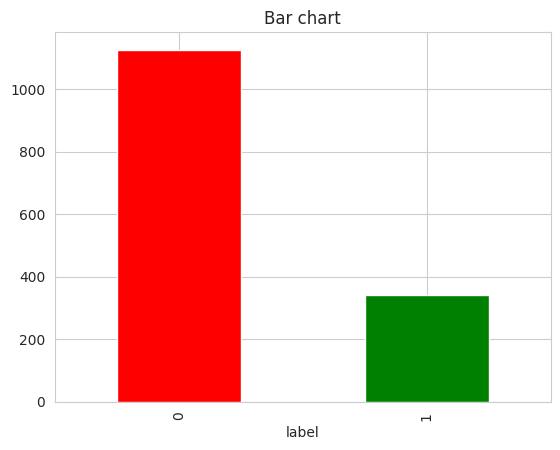

In [81]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["red", "green"])
plt.title('Bar chart')
plt.show()

# Stemming Normalization

In [83]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [84]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

ptkai['stem_review'] = ptkai['stop_review'].apply(lambda stem:back_to_root(stem))

In [85]:
ptkai.head()

,content,score,date,clean_review,normalization,final_text,token,stop_review,stem_review,label
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",1,2018-09-16,pt kai yg terhormat tolong aplikasi ini ditinj...,pt kereta api indonesia yang terhormat tolong ...,kereta indonesia yang terhormat tolong aplik...,"[kereta, indonesia, yang, terhormat, tolong, a...","[kereta, indonesia, terhormat, tolong, aplikas...",kereta indonesia hormat tolong aplikasi tinjau...,0
1,Loading nya lelet... Padahal jaringannya 4G..s...,1,2018-10-13,loading nya lelet padahal jaringannya g sblm d...,loading nya lambat padahal jaringannya tidak s...,loading lambat padahal jaringannya tidak sebe...,"[loading, lambat, padahal, jaringannya, tidak,...","[loading, lambat, jaringannya, perbarui, pemba...",loading lambat jaring baru baru lambat buka ke...,0
2,"""mohon cek koneksi anda"" harusnya diubah menja...",1,2018-10-14,mohon cek koneksi anda harusnya diubah menjadi...,mohon cek koneksi anda harusnya diubah menjadi...,mohon koneksi anda harusnya diubah menjadi mo...,"[mohon, koneksi, anda, harusnya, diubah, menja...","[mohon, koneksi, diubah, mohon, peningkatan, k...",mohon koneksi ubah mohon tingkat kapasitas ser...,0
3,Sebelum tgl 13 oktober 2018 aplikasi KAI ini b...,1,2018-10-16,sebelum tgl oktober aplikasi kai ini baik saja...,sebelum tanggal oktober aplikasi kereta api in...,sebelum tanggal oktober aplikasi kereta indon...,"[sebelum, tanggal, oktober, aplikasi, kereta, ...","[tanggal, oktober, aplikasi, kereta, indonesia...",tanggal oktober aplikasi kereta indonesia manf...,0
4,"Aplikasinya di hp saya ngebug apa gimana ya?, ...",1,2018-12-13,aplikasinya di hp saya ngebug apa gimana ya sa...,aplikasinya di hp saya ngebug apa gimana iya s...,aplikasinya saya ngebug gimana saya ingin ...,"[aplikasinya, saya, ngebug, gimana, saya, ingi...","[aplikasinya, ngebug, gimana, jadwal, ulang, t...",aplikasi ngebug gimana jadwal ulang trips kode...,0


In [86]:
from wordcloud import WordCloud

Negative Review

In [87]:
train_s0 = data_label[data_label["label"] == 0]

In [88]:
train_s0["stem_review"] = train_s0["clean_review"].fillna("tidak ada komentar")

<ipython-input-88-70a80e9150f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["stem_review"] = train_s0["clean_review"].fillna("tidak ada komentar")


In [89]:
train_s0

,score,clean_review,label,stem_review
0,1,pt kai yg terhormat tolong aplikasi ini ditinj...,0,pt kai yg terhormat tolong aplikasi ini ditinj...
1,1,loading nya lelet padahal jaringannya g sblm d...,0,loading nya lelet padahal jaringannya g sblm d...
2,1,mohon cek koneksi anda harusnya diubah menjadi...,0,mohon cek koneksi anda harusnya diubah menjadi...
3,1,sebelum tgl oktober aplikasi kai ini baik saja...,0,sebelum tgl oktober aplikasi kai ini baik saja...
4,1,aplikasinya di hp saya ngebug apa gimana ya sa...,0,aplikasinya di hp saya ngebug apa gimana ya sa...
...,...,...,...,...
1788,1,sangat sulit dari isi ulang atau aktivasi kaip...,0,sangat sulit dari isi ulang atau aktivasi kaip...
1790,1,apa susah isi kai pay uang udah ditelan masuk ...,0,apa susah isi kai pay uang udah ditelan masuk ...
1791,1,jelek aplkasi nya mending yg lama dah,0,jelek aplkasi nya mending yg lama dah
1792,1,saran aja buat yg baru pake kai access buat me...,0,saran aja buat yg baru pake kai access buat me...


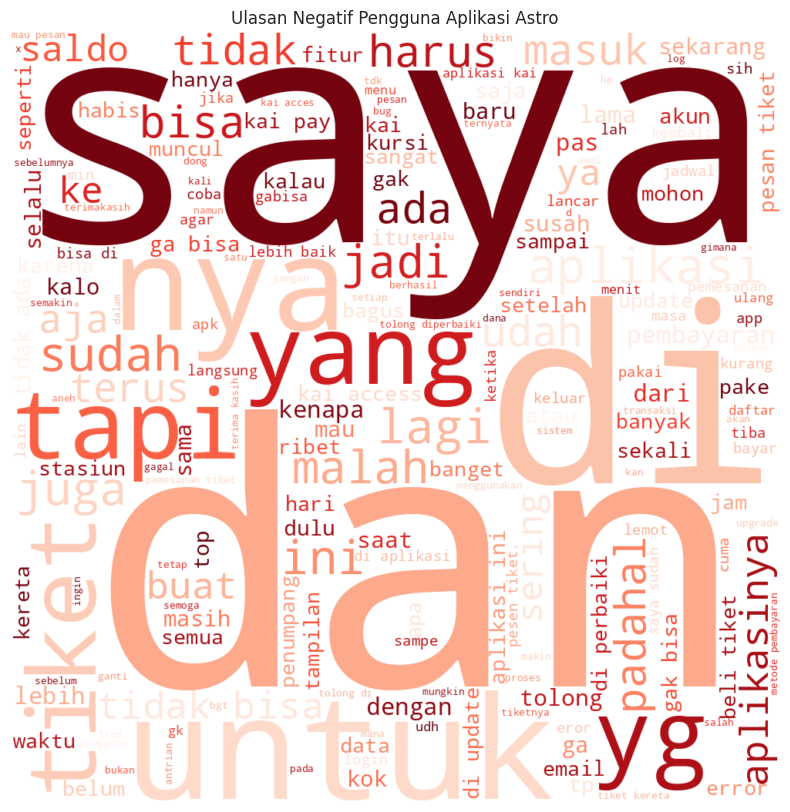

In [90]:
all_text_s0 = ' '.join(word for word in train_s0["stem_review"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Negatif Pengguna Aplikasi Astro")
plt.margins(x=0, y=0)
plt.show()

Positive Review

In [91]:
train_s1 = data_label[data_label["label"] == 1]

In [92]:
train_s1["stem_review"] = train_s1["clean_review"].fillna("tidak ada komentar")

<ipython-input-92-8cd8f6f7e5d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["stem_review"] = train_s1["clean_review"].fillna("tidak ada komentar")


In [93]:
train_s1

,score,clean_review,label,stem_review
15,2,user experience nya tolong lebih ditingkatkan ...,1,user experience nya tolong lebih ditingkatkan ...
47,2,setelah update terbaru aplikasinya jadi eror t...,1,setelah update terbaru aplikasinya jadi eror t...
48,2,ini aplikasi kai access kapan ya stabil lagi s...,1,ini aplikasi kai access kapan ya stabil lagi s...
83,2,pelayanan nya bagus sangat membantu hemat kert...,1,pelayanan nya bagus sangat membantu hemat kert...
128,2,terus tingkatkan lagi kalo bisa pembayaran dit...,1,terus tingkatkan lagi kalo bisa pembayaran dit...
...,...,...,...,...
1751,2,sangat membantu,1,sangat membantu
1756,2,cek reduksi malah nik yg ayah nama ibu saya se...,1,cek reduksi malah nik yg ayah nama ibu saya se...
1763,2,mantap,1,mantap
1778,2,saya pikir hanya saya yang mengalami kendala a...,1,saya pikir hanya saya yang mengalami kendala a...


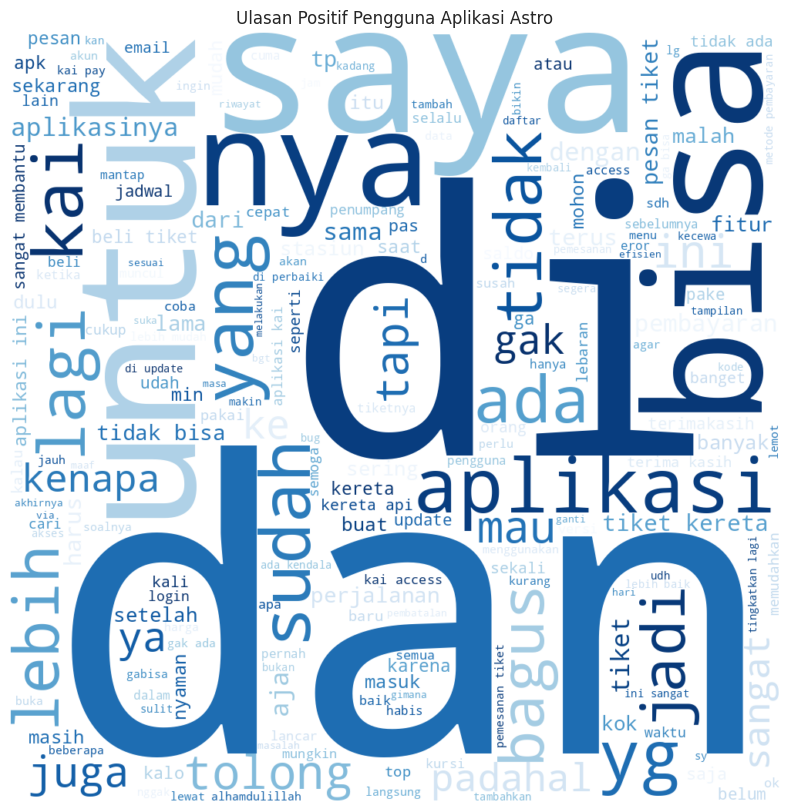

In [94]:
all_text_s1 = ' '.join(word for word in train_s1["stem_review"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif Pengguna Aplikasi Astro")
plt.margins(x=0, y=0)
plt.show()

# Menyiapkan Data Train dan Test

### Mencari parameter untuk data splitting terbaik yang menghasilkan nilai akurasi paling tinggi dan meminimalisir model melakukan kesalahan prediksi

In [ ]:
from sklearn.model_selection import train_test_split

In [95]:
# test_num = []
# random_num = []
# acc_num = []
# re_num = []
# pre_num = []
# matrix = []
# report = []

# for test in np.arange(0.1, 0.4, 0.1):
#   for random in np.arange(0, 30, 5):
#     print("test size:", test)
#     print("random state:", random)
#     X_train, X_test, y_train, y_test = train_test_split(data_label['clean_review'], data_label['label'], test_size=test, random_state=random)
#     vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
#     X_train_vect = vectorizer.fit_transform(X_train)
#     X_test_vect = vectorizer.transform(X_test)
#     naive_bayes = MultinomialNB()
#     naive_bayes.fit(X_train_vect.toarray(), y_train)
#     print(naive_bayes.score(X_train_vect.toarray(), y_train))
#     predict = naive_bayes.predict(X_test_vect.toarray())
#     accuracy = accuracy_score(y_test, predict)
#     confusion = confusion_matrix(y_test, predict)
#     print('confusion matrix:\n', confusion)
#     classfication = print(classification_report(y_test, predict))
#     print("Accuracy Score:", accuracy.round(2))
#     recall = recall_score(y_test, predict)
#     print("Recall Score:", recall)
#     precision = precision_score(y_test, predict)
#     print("Precision Score:", precision)
#     print("\n")

#     random_num.append(random)
#     matrix.append(confusion)
#     report.append(classfication)
#     acc_num.append(accuracy)
#     re_num.append(recall)
#     pre_num.append(precision)
#     test_num.append(test)
#   print("=================================================================")

test size: 0.1
random state: 0
0.7945413191811979
confusion matrix:
 [[114   0]
 [ 29   4]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       114
           1       1.00      0.12      0.22        33

    accuracy                           0.80       147
   macro avg       0.90      0.56      0.55       147
weighted avg       0.84      0.80      0.74       147

Accuracy Score: 0.8
Recall Score: 0.12121212121212122
Precision Score: 1.0


test size: 0.1
random state: 5
0.800606520090978
confusion matrix:
 [[106   0]
 [ 37   4]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       106
           1       1.00      0.10      0.18        41

    accuracy                           0.75       147
   macro avg       0.87      0.55      0.51       147
weighted avg       0.81      0.75      0.66       147

Accuracy Score: 0.75
Recall Score: 0.0975609756097561
Precision Score: 1.0


test size

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

0.796057619408643
confusion matrix:
 [[113   0]
 [ 30   4]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       113
           1       1.00      0.12      0.21        34

    accuracy                           0.80       147
   macro avg       0.90      0.56      0.55       147
weighted avg       0.84      0.80      0.73       147

Accuracy Score: 0.8
Recall Score: 0.11764705882352941
Precision Score: 1.0


test size: 0.1
random state: 20
0.800606520090978
confusion matrix:
 [[101   0]
 [ 45   1]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       101
           1       1.00      0.02      0.04        46

    accuracy                           0.69       147
   macro avg       0.85      0.51      0.43       147
weighted avg       0.79      0.69      0.58       147

Accuracy Score: 0.69
Recall Score: 0.021739130434782608
Precision Score: 1.0


test size: 0.1
random state: 25
0.7990

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

0.7960750853242321
confusion matrix:
 [[226   0]
 [ 61   7]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       226
           1       1.00      0.10      0.19        68

    accuracy                           0.79       294
   macro avg       0.89      0.55      0.53       294
weighted avg       0.84      0.79      0.72       294

Accuracy Score: 0.79
Recall Score: 0.10294117647058823
Precision Score: 1.0


test size: 0.2
random state: 5
0.7926621160409556
confusion matrix:
 [[223   0]
 [ 67   4]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       223
           1       1.00      0.06      0.11        71

    accuracy                           0.77       294
   macro avg       0.88      0.53      0.49       294
weighted avg       0.82      0.77      0.69       294

Accuracy Score: 0.77
Recall Score: 0.056338028169014086
Precision Score: 1.0


test size: 0.2
random state: 10
0.79

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

0.7884990253411306
confusion matrix:
 [[337   0]
 [ 98   5]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       337
           1       1.00      0.05      0.09       103

    accuracy                           0.78       440
   macro avg       0.89      0.52      0.48       440
weighted avg       0.83      0.78      0.69       440

Accuracy Score: 0.78
Recall Score: 0.04854368932038835
Precision Score: 1.0


test size: 0.30000000000000004
random state: 5
0.7923976608187134
confusion matrix:
 [[336   0]
 [ 99   5]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       336
           1       1.00      0.05      0.09       104

    accuracy                           0.78       440
   macro avg       0.89      0.52      0.48       440
weighted avg       0.83      0.78      0.69       440

Accuracy Score: 0.78
Recall Score: 0.04807692307692308
Precision Score: 1.0


test size: 0.30000000

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['clean_review'], data_label['label'],
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

In [181]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)

In [182]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1319, 4038)
(147, 4038)


In [183]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [184]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV


# Deklarasi metode cross-validation
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

# Tuning hyperparameter menggunakan GridSearchCV
params_NB = {'alpha': np.logspace(0, -9, num=100)}
nb = MultinomialNB()
naive_bayes = GridSearchCV(estimator=nb,
                       param_grid=params_NB,
                       cv=cv_method,   # use any cross-validation technique
                       verbose=1,
                       scoring='accuracy')

# Fitting ke Model
naive_bayes.fit(X_train, y_train)

# Mendapatkan hyperparameters terbaik
best_params = naive_bayes.best_params_
print("Best hyperparameters:", best_params)


Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Best hyperparameters: {'alpha': 0.23101297000831597}


In [147]:
naive_bayes.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=MultinomialNB(),
             param_grid={'alpha': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.3366...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [185]:
y_pred_nab =naive_bayes.predict(X_test)

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [186]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nab))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nab))

--------------------- confusion matrix  ----------------------------
[[112   1]
 [ 28   6]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       113
           1       0.86      0.18      0.29        34

    accuracy                           0.80       147
   macro avg       0.83      0.58      0.59       147
weighted avg       0.81      0.80      0.75       147



In [187]:
predict = naive_bayes.predict(X_test)

In [188]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [189]:
predict_df = pd.DataFrame(predict, columns=['predict'])

In [190]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[0])

7
140


In [191]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,0,140
1,1,7


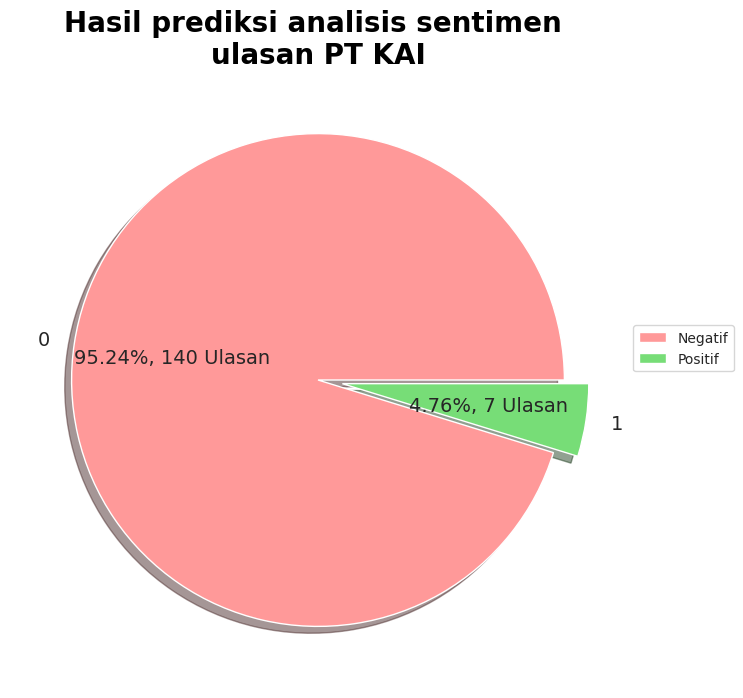

In [192]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan PT KAI', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])

plt.savefig('Hasilprediksi_ptkai.png')
plt.show()

In [194]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[112,   1],
       [ 28,   6]])

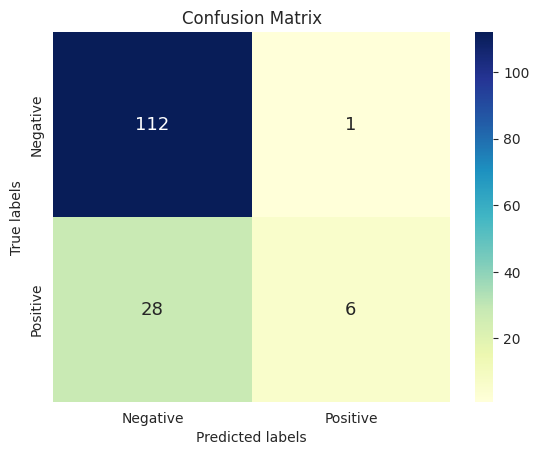

In [195]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

# **Model Testing**

In [196]:
# Define the new input text
new_input_text = 'pt kereta api indonesia yang terhormat tolong aplikasi ini ditinjau ulang karena saya ingin pindah kursi tidak dapat padahal dahulu waktu awal nya terlihat aplikasi ini untuk pindah kursi masih dapat setelah berulang kali diupdate bagaimana malah tidak bisa pilih kursi sendiri mohon dicarikan solusinya'

# Transform the preprocessed text using the TF-IDF vectorizer
transformed_text = vectorizer.transform([new_input_text])

# Make predictions using the trained Naive Bayes classifier
predicted_label = naive_bayes.predict(transformed_text)

# Print the predicted label
if predicted_label[0] == 1:
    print("The sentiment of the input text is positive.")
else:
    print("The sentiment of the input text is negative.")


The sentiment of the input text is negative.


# **Export Model & vectorizer**

In [197]:
import pickle

pickle.dump(naive_bayes, open('sentiment.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer_tfidf.pkl', 'wb'))

# **Local Deployment**

In [198]:
# Gunakan Streamlit untuk deploy

!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [199]:
%%writefile requirements.txt

streamlit
pandas
scikit_learn==1.2.2

Writing requirements.txt


In [200]:
%%writefile app.py


import streamlit as st
import pickle
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import time

model = pickle.load(open('sentiment.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer_tfidf.pkl', 'rb'))

st.title('Review Apps Sentiment Analysis')

coms = st.text_input('Enter your commentary about the app')

submit = st.button('Predict')

if submit:
    start = time.time()
    # Transform the input text using the loaded TF-IDF vectorizer
    transformed_text = vectorizer.transform([coms]).toarray()
    #st.write('Transformed text shape:', transformed_text.shape)  # Debugging statement
    # Reshape the transformed text to 2D array
    transformed_text = transformed_text.reshape(1, -1)
    #st.write('Reshaped text shape:', transformed_text.shape)  # Debugging statement
    # Make prediction
    prediction = model.predict(transformed_text)
    end = time.time()
    st.write('Prediction time taken: ', round(end-start, 2), 'seconds')

    print(prediction[0])
    if prediction[0] == 1:
        st.write("Sentimen review anda positif")
    else:
        st.write("Sentimen review anda negatif")

Writing app.py


In [201]:
! wget -q -O - ipv4.icanhazip.com

34.69.238.252


In [202]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.69.238.252:8501

npx: installed 22 in 7.705s
your url is: https://all-crabs-relate.loca.lt
0
  Stopping...
^C
